# Capstone Project :

### Problem statement: 


##### A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, you want to sell a house and you don’t know the price which you can take — it can’t be too low or too high. To find house price you usually try to find similar properties in your neighbourhood and based on gathered data you will try to assess your house price. 

###### Objective:

Take advantage of all of the feature variables available below, use it to analyse and predict house prices. 

1.	cid: a notation for a house
2.	dayhours: Date house was sold
3.	price: Price is prediction target
4.	room_bed: Number of Bedrooms/House
5.	room_bath: Number of bathrooms/bedrooms
6.	living_measure: square footage of the home
7.	lot_measure: quare footage of the lot
8.	ceil: Total floors (levels) in house
9.	coast: House which has a view to a waterfront
10.	sight: how many members Has been viewed
11.	condition: How good the condition is (Overall)
12.	quality: grade given to the housing unit, based on grading system
13.	ceil_measure: square footage of house apart from basement
14.	basement_measure: square footage of the basement
15.	yr_built: Built Year
16.	yr_renovated: Year when house was renovated
17.	zipcode: zip
18.	lat: Latitude coordinate
19.	long: Longitude coordinate
20.	living_measure15:Living room area in 2015(some renovations)This might or might not have affected the lotsize area
21.	lot_measure15: lotSize area in 2015(some renovations)
22.	furnished: Based on the quality of room 
23.	 total_area: Measure of both living and lot

### Work:

In [1]:
import warnings
warnings.filterwarnings('ignore')

#eda
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats as stats
import statsmodels.api as sm
import copy
import scipy
import pylab
import statsmodels
#from pandas_profiling import ProfileReport

#modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

# EDA

In [2]:
df=pd.read_csv('innercity.csv')

In [3]:
df.shape

(21613, 23)

In [4]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [5]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [6]:
from datetime import datetime
def clean(i):
  return datetime.strptime(i[:8], '%Y%m%d')

In [7]:
df.dayhours=df.dayhours.apply(clean)
df_org=copy.deepcopy(df)

In [8]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,2014-11-07,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,2014-12-04,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,2015-04-20,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,2014-05-29,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,2015-04-24,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null datetime64[ns]
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished    

In [10]:
df.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.196687,1.718687e+04
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.397503,4.158908e+04
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,1.423000e+03
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000,7.035000e+03
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000,9.575000e+03
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000,1.300000e+04
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.652659e+06


# Feature analysis:

In [11]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

# basement

In [12]:
df.basement

0           0
1         800
2           0
3           0
4           0
5           0
6           0
7         880
8        1200
9           0
10          0
11          0
12          0
13        620
14       1720
15          0
16          0
17        540
18          0
19          0
20          0
21        620
22          0
23          0
24        500
25        720
26          0
27        390
28       1800
29        810
         ... 
21583       0
21584       0
21585     670
21586     500
21587       0
21588     500
21589       0
21590    1150
21591     370
21592       0
21593       0
21594       0
21595       0
21596     450
21597       0
21598       0
21599       0
21600       0
21601       0
21602       0
21603     810
21604       0
21605     440
21606       0
21607       0
21608       0
21609       0
21610       0
21611       0
21612       0
Name: basement, Length: 21613, dtype: int64

In [13]:
df.drop('cid',1,inplace=True)

# base

In [14]:
#Creating a new column called Base 

In [15]:
df['base']=df.basement.where(cond=df.basement==0,other=1)

In [16]:
df['base']

0        0
1        1
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        0
10       0
11       0
12       0
13       1
14       1
15       0
16       0
17       1
18       0
19       0
20       0
21       1
22       0
23       0
24       1
25       1
26       0
27       1
28       1
29       1
        ..
21583    0
21584    0
21585    1
21586    1
21587    0
21588    1
21589    0
21590    1
21591    1
21592    0
21593    0
21594    0
21595    0
21596    1
21597    0
21598    0
21599    0
21600    0
21601    0
21602    0
21603    1
21604    0
21605    1
21606    0
21607    0
21608    0
21609    0
21610    0
21611    0
21612    0
Name: base, Length: 21613, dtype: int64

In [17]:
df['base'].value_counts()

0    13126
1     8487
Name: base, dtype: int64

# yr_renovated

In [18]:
df.yr_renovated

0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13       1987
14          0
15          0
16          0
17          0
18          0
19          0
20       1982
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
         ... 
21583       0
21584       0
21585       0
21586       0
21587       0
21588       0
21589       0
21590       0
21591       0
21592       0
21593       0
21594       0
21595       0
21596       0
21597       0
21598       0
21599       0
21600       0
21601       0
21602       0
21603       0
21604       0
21605       0
21606       0
21607       0
21608       0
21609       0
21610       0
21611       0
21612       0
Name: yr_renovated, Length: 21613, dtype: int64

# renovated

In [19]:
df['renovated']=df.yr_renovated.where(df.yr_renovated==0,1)
df.renovated

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       0
17       0
18       0
19       0
20       1
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
21583    0
21584    0
21585    0
21586    0
21587    0
21588    0
21589    0
21590    0
21591    0
21592    0
21593    0
21594    0
21595    0
21596    0
21597    0
21598    0
21599    0
21600    0
21601    0
21602    0
21603    0
21604    0
21605    0
21606    0
21607    0
21608    0
21609    0
21610    0
21611    0
21612    0
Name: renovated, Length: 21613, dtype: int64

## dayhours

In [20]:
date_min=df.dayhours.min()
def to_days(i):
  return (i-date_min).days
date_min

Timestamp('2014-05-02 00:00:00')

In [21]:
df['dayhours']=df.dayhours.apply(to_days)

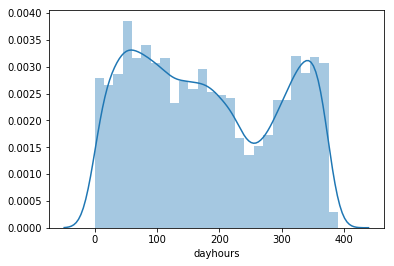

In [22]:
sns.distplot(df.dayhours)

the plots sold 

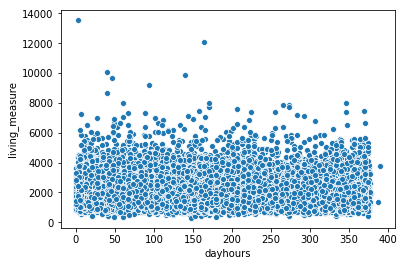

In [23]:
sns.scatterplot('dayhours','living_measure',data=df)

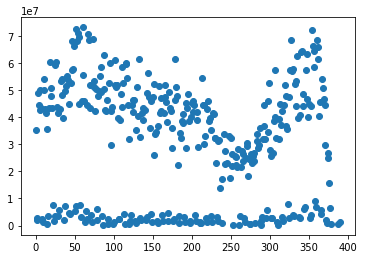

In [24]:
plt.plot(df.price.groupby(df.dayhours).sum().index,df.price.groupby(df.dayhours).sum(),'o')

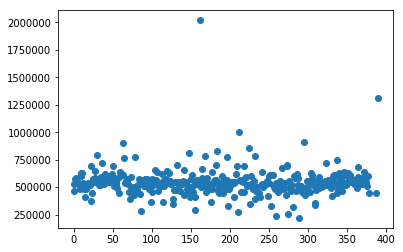

In [25]:
plt.plot(df.price.groupby(df.dayhours).mean().index,df.price.groupby(df.dayhours).mean(),'o')

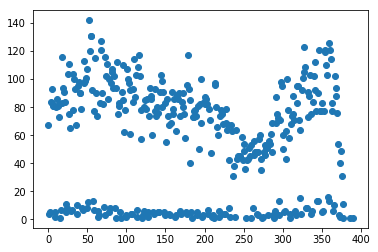

In [26]:
plt.plot(df.price.groupby(df.dayhours).count().index,df.price.groupby(df.dayhours).count(),'o')

In [27]:
np.corrcoef(df.dayhours,df.price)[0,1]

-0.004366448224375409

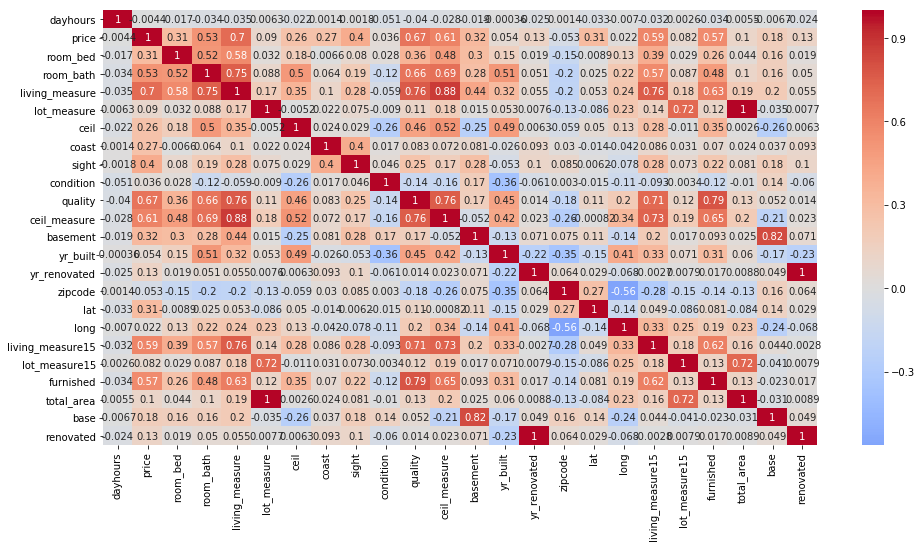

In [28]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,center=0,cmap='coolwarm')
plt.show()

## price

###univariate:

In [29]:
df.price.describe().apply(lambda x: format(x, 'f'))

count      21613.000000
mean      540182.158793
std       367362.231718
min        75000.000000
25%       321950.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object

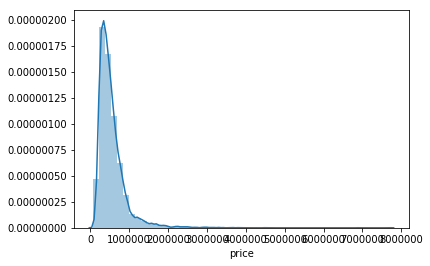

In [30]:
sns.distplot(df.price)
plt.show()

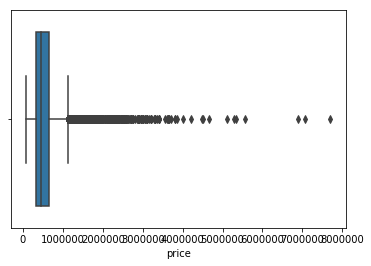

In [31]:
sns.boxplot('price',data=df)
plt.show()

In [32]:
q1=df.price.describe()['25%']
q3=df.price.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_price=df[(df.price<ul) & (df.price>ll)]
df_price.price.describe().apply(lambda x: format(x, 'f'))

count      20454.000000
mean      476591.229002
std       207847.949138
min        75000.000000
25%       315000.000000
50%       437200.000000
75%       600000.000000
max      1120000.000000
Name: price, dtype: object

In [33]:
print('number of outliers in price:{} out of {} which is {}%'.format(df.price.count()-df_price.price.count(),df.price.count(),(df.price.count()-df_price.price.count())*100/df.price.count()))

number of outliers in price:1159 out of 21613 which is 5.362513302179244%


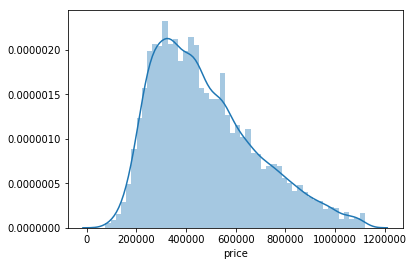

In [34]:
sns.distplot(df_price.price)

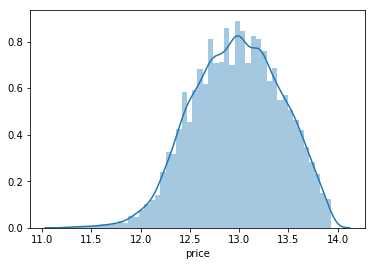

In [35]:
sns.distplot(np.log(df_price.price))

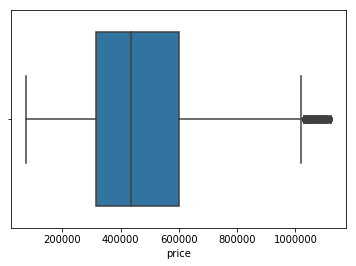

In [36]:
sns.boxplot(df_price.price)

## price vs room_bed:

In [37]:
df.room_bed.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: room_bed, dtype: int64

In [38]:
df_room_bed=df[df.room_bed.isin([1,2,3,4,5,6])]

In [39]:
df.room_bed.count()-df_room_bed.room_bed.count()

75

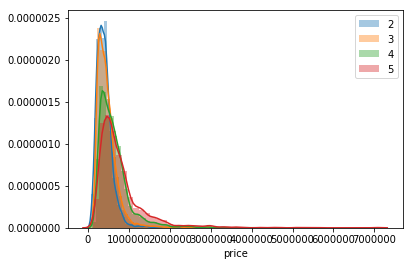

In [40]:
#sns.distplot(df.price[df.room_bed==0],label='0')
#sns.distplot(df.price[df.room_bed==1],label='1')
sns.distplot(df.price[df.room_bed==2],label='2')
sns.distplot(df.price[df.room_bed==3],label='3')
sns.distplot(df.price[df.room_bed==4],label='4')
sns.distplot(df.price[df.room_bed==5],label='5')
#sns.distplot(df.price[df.room_bed==6],label='6')
#sns.distplot(df.price[df.room_bed==7],label='7')
#sns.distplot(df.price[df.room_bed==8],label='8')
#sns.distplot(df.price[df.room_bed==9],label='9')
#sns.distplot(df.price[df.room_bed==10],label='10')
plt.legend()
plt.show()

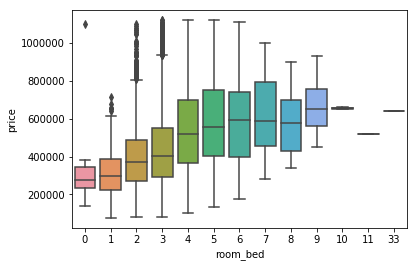

In [41]:
sns.boxplot('room_bed','price', data=df_price)

## price vs room_bath

In [42]:
df.room_bath.value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: room_bath, dtype: int64

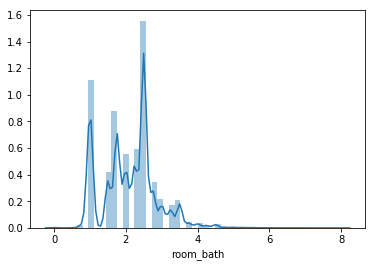

In [43]:
sns.distplot(df.room_bath)

In [44]:
df_room_bath=df[(df.room_bath<=4.5) & (df.room_bath>=1)]

In [45]:
df_room_bath.room_bath.count()-df.room_bath.count()

-173

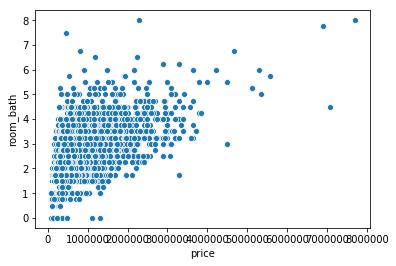

In [46]:
sns.scatterplot('price','room_bath',data=df)

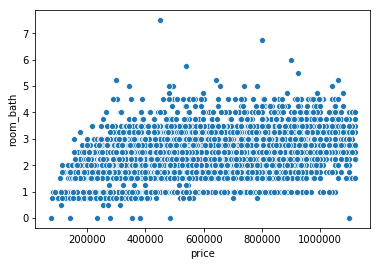

In [47]:
sns.scatterplot('price','room_bath',data=df_price)

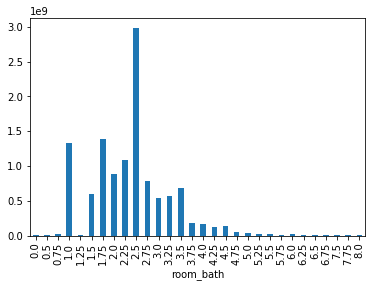

In [48]:
df.price.groupby(df.room_bath).sum().plot(kind='bar')

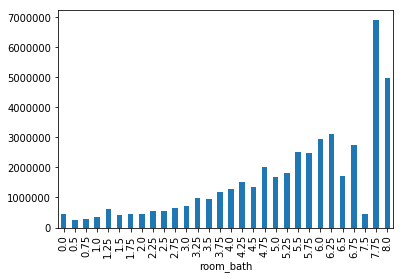

In [49]:
df.price.groupby(df.room_bath).mean().plot(kind='bar')

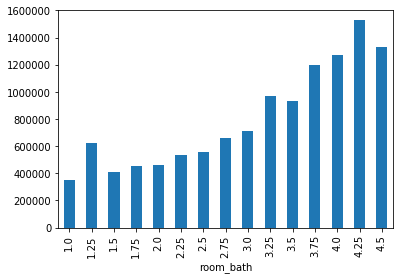

In [50]:
df_room_bath.price.groupby(df_room_bath.room_bath).mean().plot(kind='bar') #shows us that price of a house increases with room_bath

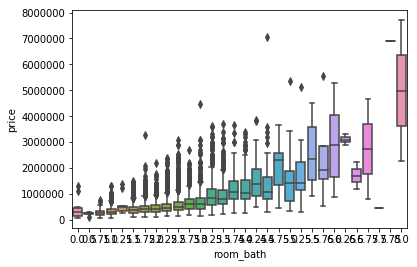

In [51]:
sns.boxplot('room_bath', 'price', data=df)

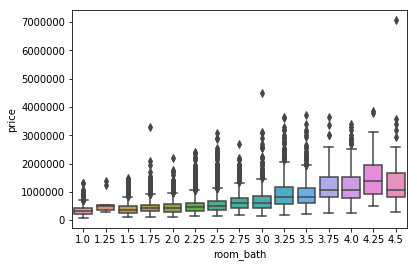

In [52]:
sns.boxplot('room_bath', 'price', data=df_room_bath)

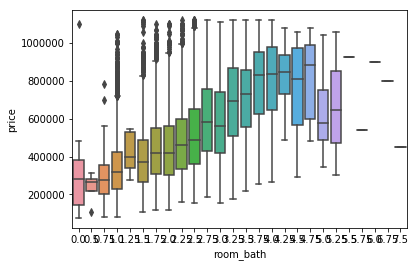

In [53]:
sns.boxplot('room_bath', 'price', data=df_price)

### price vs living_measure

In [54]:
df.living_measure.describe().apply(lambda x: format(x, 'f'))

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: living_measure, dtype: object

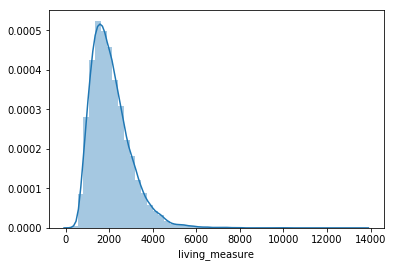

In [55]:
sns.distplot(df.living_measure)

In [56]:
q1=df.living_measure.describe()['25%']
q3=df.living_measure.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_living_measure=df[(df.living_measure<ul) & (df.living_measure>ll)]
df_living_measure.living_measure.describe().apply(lambda x: format(x, 'f'))

count    21041.000000
mean      1998.912504
std        768.967791
min        290.000000
25%       1410.000000
50%       1890.000000
75%       2490.000000
max       4230.000000
Name: living_measure, dtype: object

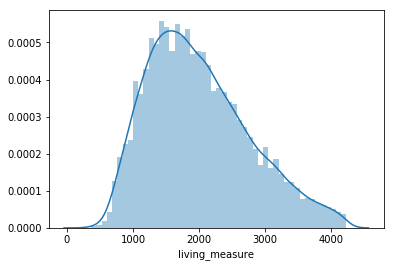

In [57]:
sns.distplot(df_living_measure.living_measure)

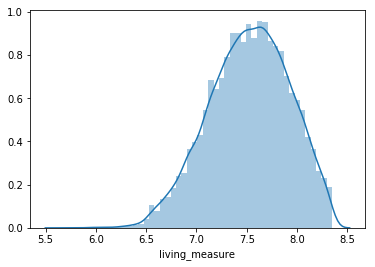

In [58]:
sns.distplot(np.log(df_living_measure.living_measure))

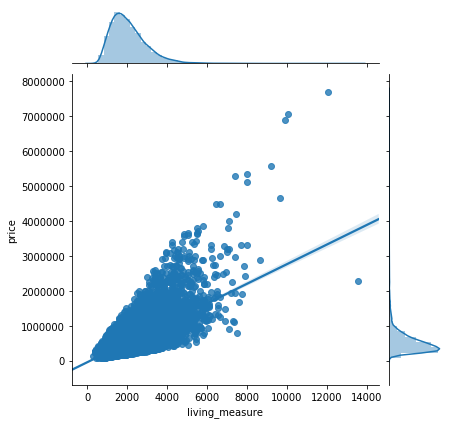

In [59]:
sns.jointplot('living_measure','price', data=df,kind='reg')


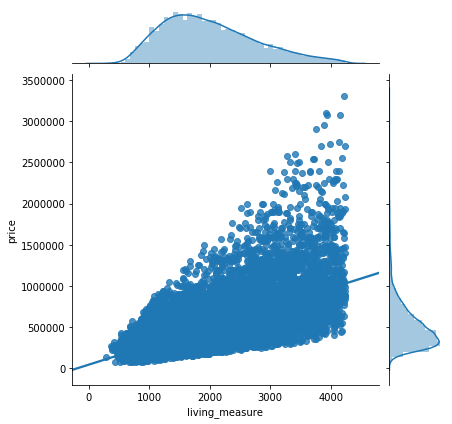

In [60]:
sns.jointplot('living_measure','price', data=df_living_measure,kind='reg')

## price vs lot_measure

In [61]:
df.lot_measure.describe().apply(lambda x: format(x, 'f'))

count      21613.000000
mean       15106.967566
std        41420.511515
min          520.000000
25%         5040.000000
50%         7618.000000
75%        10688.000000
max      1651359.000000
Name: lot_measure, dtype: object

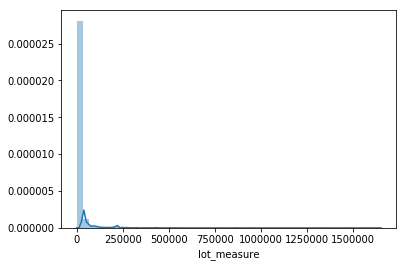

In [62]:
sns.distplot(df.lot_measure)

In [63]:
q1=df.lot_measure.describe()['25%']
q3=df.lot_measure.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_lot_measure=df[(df.lot_measure<ul) & (df.lot_measure>ll)]
df_lot_measure.lot_measure.describe().apply(lambda x: format(x, 'f'))

count    19188.000000
mean      7383.938712
std       3622.891206
min        520.000000
25%       4904.750000
50%       7200.000000
75%       9435.000000
max      19141.000000
Name: lot_measure, dtype: object

In [64]:
q1=df_price.lot_measure.describe()['25%']
q3=df_price.lot_measure.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_price_lot_measure=df_price[(df_price.lot_measure<ul) & (df_price.lot_measure>ll)]

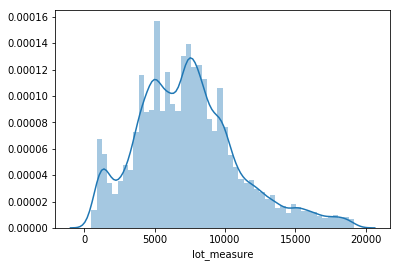

In [65]:
sns.distplot(df_lot_measure.lot_measure)

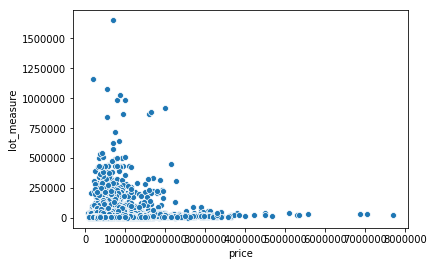

In [66]:
sns.scatterplot('price', 'lot_measure', data=df)

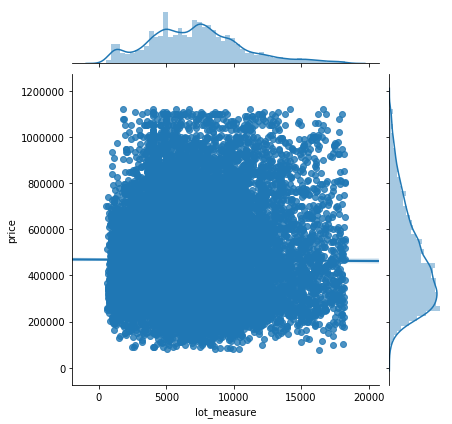

In [67]:
sns.jointplot('lot_measure', 'price', data=df_price_lot_measure,kind='reg')

## price vs ceil:

In [68]:
df.ceil.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: ceil, dtype: int64

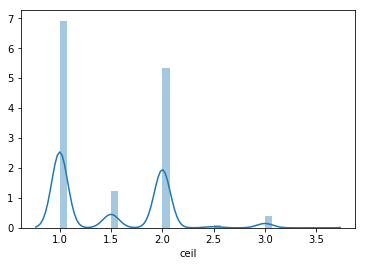

In [ ]:
sns.distplot(df.ceil)

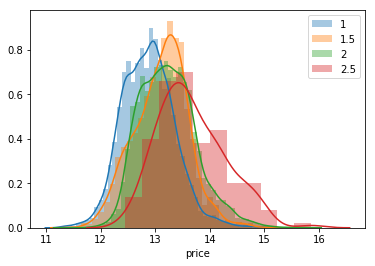

In [ ]:
sns.distplot(np.log(df.price[df.ceil==1]),label='1')
sns.distplot(np.log(df.price[df.ceil==1.5]),label='1.5')
sns.distplot(np.log(df.price[df.ceil==2]),label='2')
sns.distplot(np.log(df.price[df.ceil==2.5]),label='2.5')
plt.legend()
plt.show()

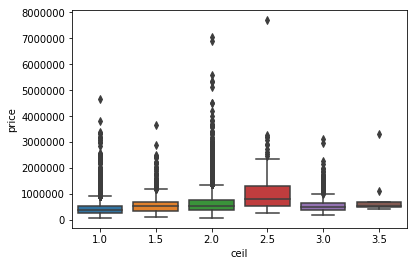

In [ ]:
sns.boxplot('ceil', 'price', data=df)

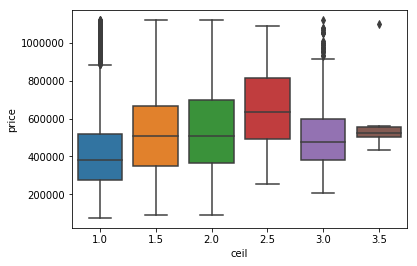

In [ ]:
sns.boxplot('ceil', 'price', data=df_price)

In [ ]:
df4=df[(df.ceil<3)]
np.corrcoef(df4.price,df4.ceil)

array([[1.        , 0.28450631],
       [0.28450631, 1.        ]])

In [ ]:
df4.shape[0]/df.shape[0]

0.9712672928330172

In [ ]:
df.coast.value_counts()

0    21450
1      163
Name: coast, dtype: int64

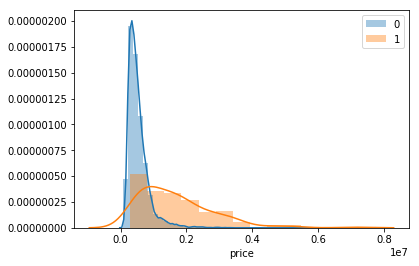

In [ ]:
sns.distplot((df.price[df.coast==0]),label='0')
sns.distplot((df.price[df.coast==1]),label='1')
plt.legend()
plt.show()

## price vs coast

In [ ]:
df.coast.value_counts()

0    21450
1      163
Name: coast, dtype: int64

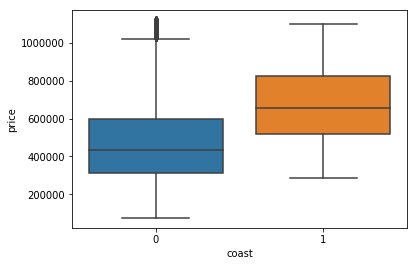

In [ ]:
sns.boxplot('coast', 'price', data=df_price)

[]

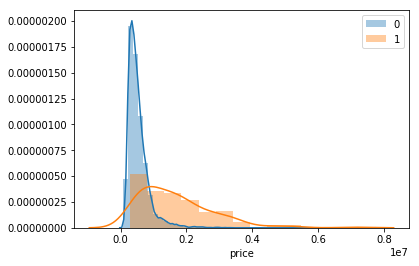

In [ ]:
sns.distplot(df.price[df.coast==0],label='0')
sns.distplot(df.price[df.coast==1],label='1')
plt.legend()
plt.plot()

[]

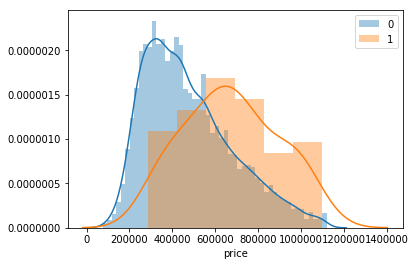

In [ ]:
sns.distplot(df_price.price[df_price.coast==0],label='0')
sns.distplot(df_price.price[df_price.coast==1],label='1')
plt.legend()
plt.plot()

## price vs sight

In [ ]:
df.sight.value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: sight, dtype: int64

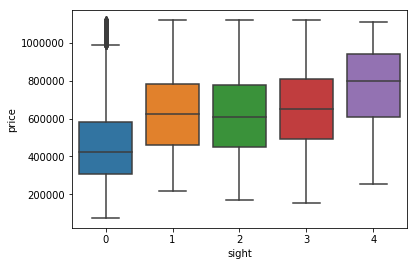

In [ ]:
sns.boxplot('sight', 'price', data=df_price)

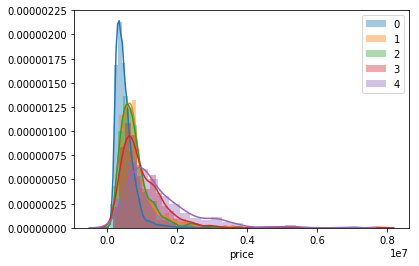

In [ ]:
sns.distplot(df.price[df.sight==0],label='0')
sns.distplot(df.price[df.sight==1],label='1')
sns.distplot(df.price[df.sight==2],label='2')
sns.distplot(df.price[df.sight==3],label='3')
sns.distplot(df.price[df.sight==4],label='4')
plt.legend()
plt.show()

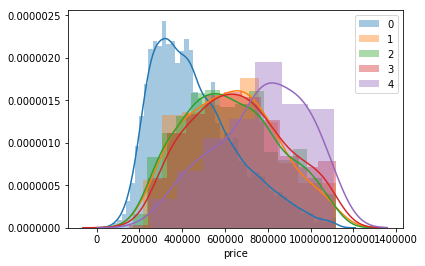

In [ ]:
sns.distplot(df_price.price[df_price.sight==0],label='0')
sns.distplot(df_price.price[df_price.sight==1],label='1')
sns.distplot(df_price.price[df_price.sight==2],label='2')
sns.distplot(df_price.price[df_price.sight==3],label='3')
sns.distplot(df_price.price[df_price.sight==4],label='4')
plt.legend()
plt.show()

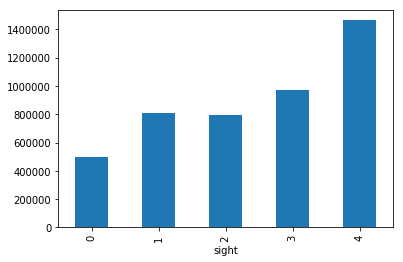

In [ ]:
df.price.groupby(df.sight).mean().plot(kind='bar')

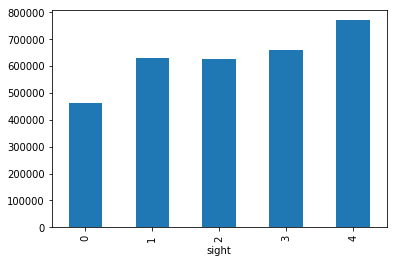

In [ ]:
df_price.price.groupby(df_price.sight).mean().plot(kind='bar')

## price vs condition

In [ ]:
df.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

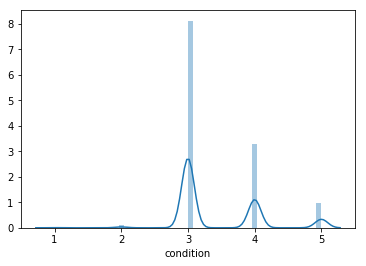

In [ ]:
sns.distplot(df.condition)

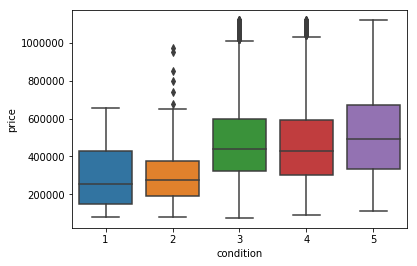

In [ ]:
sns.boxplot('condition', 'price',data=df_price)

## price vs quality

In [ ]:
df.quality.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: quality, dtype: int64

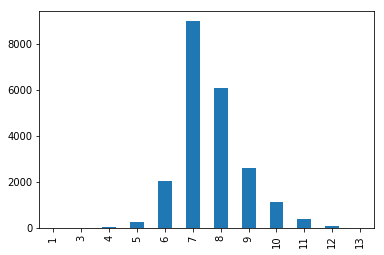

In [ ]:
df.quality.value_counts(sort= False).plot(kind='bar')

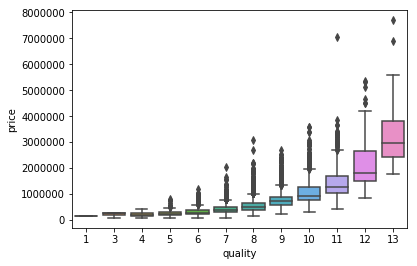

In [ ]:
sns.boxplot('quality', 'price', data=df)

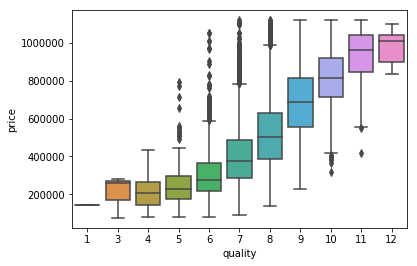

In [ ]:
sns.boxplot('quality', 'price', data=df_price)

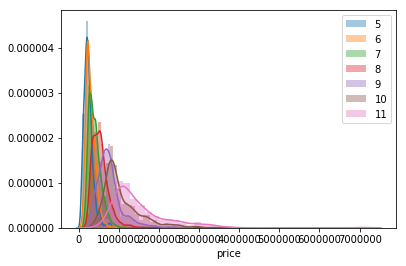

In [ ]:
sns.distplot(df.price[df.quality==5],label='5')
sns.distplot(df.price[df.quality==6],label='6')
sns.distplot(df.price[df.quality==7],label='7')
sns.distplot(df.price[df.quality==8],label='8')
sns.distplot(df.price[df.quality==9],label='9')
sns.distplot(df.price[df.quality==10],label='10')
sns.distplot(df.price[df.quality==11],label='11')
plt.legend()
plt.show()

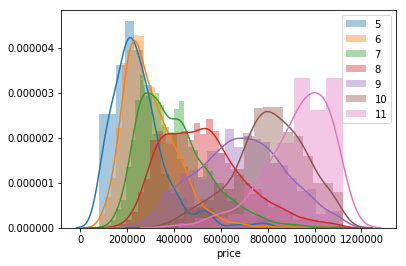

In [ ]:
sns.distplot(df_price.price[df_price.quality==5],label='5')
sns.distplot(df_price.price[df_price.quality==6],label='6')
sns.distplot(df_price.price[df_price.quality==7],label='7')
sns.distplot(df_price.price[df_price.quality==8],label='8')
sns.distplot(df_price.price[df_price.quality==9],label='9')
sns.distplot(df_price.price[df_price.quality==10],label='10')
sns.distplot(df_price.price[df_price.quality==11],label='11')
plt.legend()
plt.show()

### price vs ceil_measure

In [ ]:
df.ceil_measure.describe().apply(lambda x:format(x,'f'))

count    21613.000000
mean      1788.390691
std        828.090978
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: ceil_measure, dtype: object

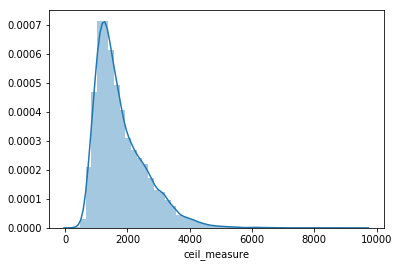

In [ ]:
sns.distplot(df.ceil_measure)

In [ ]:
q1=df.ceil_measure.describe()['25%']
q3=df.ceil_measure.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_ceil_measure=df[(df.ceil_measure<ul) & (df.ceil_measure>ll)]
df_ceil_measure.ceil_measure.describe().apply(lambda x: format(x, 'f'))

count    20994.000000
mean      1711.465466
std        695.049962
min        290.000000
25%       1180.000000
50%       1540.000000
75%       2130.000000
max       3730.000000
Name: ceil_measure, dtype: object

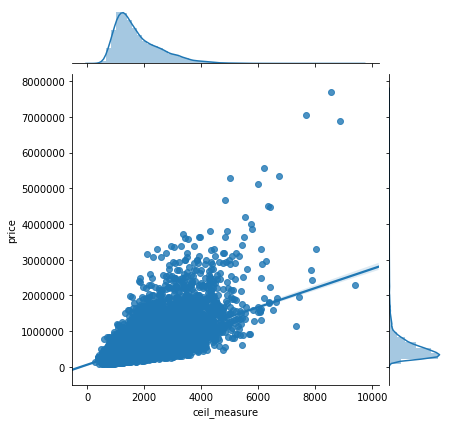

In [ ]:
sns.jointplot('ceil_measure', 'price', data=df,kind='reg')

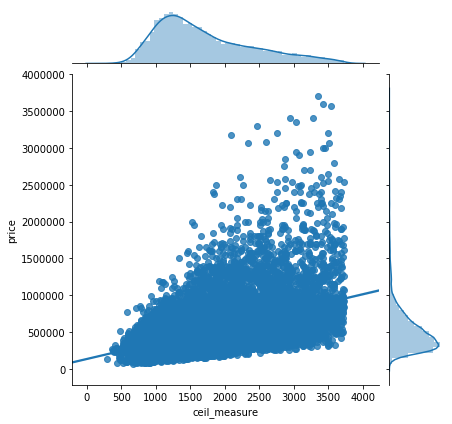

In [ ]:
sns.jointplot('ceil_measure', 'price', data=df_ceil_measure,kind='reg')

## price vs basement

In [ ]:
df.basement.describe().apply(lambda x: format(x,'f'))

count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: basement, dtype: object

([<matplotlib.patches.Wedge at 0x16ba1c50>,
 [Text(-0.36388358962885187, 1.038069714999345, '13126 houses without_basement'),
  Text(0.36388349243774937, -1.0380697490685808, '8487 houses with_basement')])

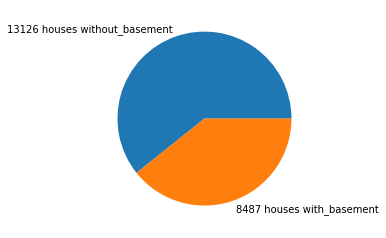

In [ ]:
plt.pie(df.base.value_counts(),labels=['13126 houses without_basement','8487 houses with_basement' ])

In [ ]:
df.basement.value_counts()

0       13126
600       221
700       218
500       214
800       206
400       184
1000      149
900       144
300       142
200       108
530       107
480       106
750       105
450       103
720       102
620        91
580        85
840        85
420        81
860        80
1100       80
670        79
780        77
380        76
850        76
550        76
650        76
680        75
240        74
360        73
        ...  
1525        1
2580        1
2500        1
2180        1
1990        1
1284        1
516         1
276         1
20          1
915         1
2850        1
1798        1
2310        1
266         1
2120        1
1913        1
1481        1
3480        1
3000        1
2600        1
2360        1
1960        1
295         1
1880        1
1816        1
792         1
2590        1
935         1
2390        1
248         1
Name: basement, Length: 306, dtype: int64

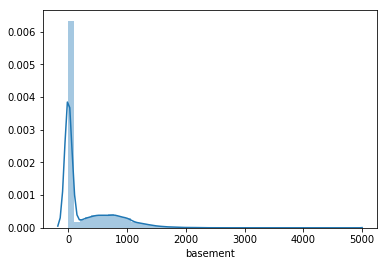

In [ ]:
sns.distplot(df.basement)

In [ ]:
q1=df[df.basement!=0].basement.describe()['25%']
q3=df[df.basement!=0].basement.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_basement=df[df.basement!=0][(df[df.basement!=0].basement<ul) & (df[df.basement!=0].basement>ll)]
df_basement.basement.describe().apply(lambda x: format(x, 'f'))

count    8328.000000
mean      716.524976
std       358.212090
min        10.000000
25%       440.000000
50%       700.000000
75%       950.000000
max      1770.000000
Name: basement, dtype: object

In [ ]:
q1=df_price[df_price.basement!=0].basement.describe()['25%']
q3=df_price[df_price.basement!=0].basement.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_price_basement=df_price[df_price.basement!=0][(df_price[df_price.basement!=0].basement<ul) & (df_price[df_price.basement!=0].basement>ll)]

In [ ]:
(df.basement>ul).sum()

203

In [ ]:
df_basement.shape[0]/df.shape[0]

0.3853236478045621

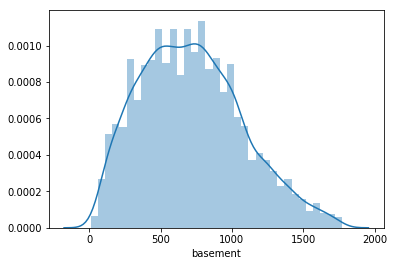

In [ ]:
sns.distplot(df_basement.basement)

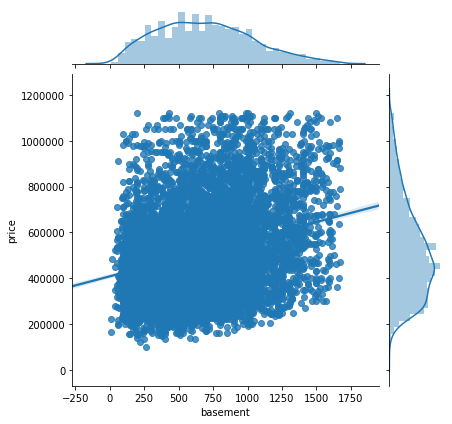

In [ ]:
sns.jointplot('basement','price', data=df_price_basement,kind='reg')

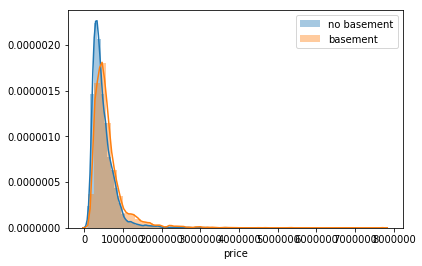

In [ ]:
sns.distplot(df.price[df.basement==0],label='no basement')
sns.distplot(df.price[df.basement!=0],label='basement')
plt.legend()
plt.show()

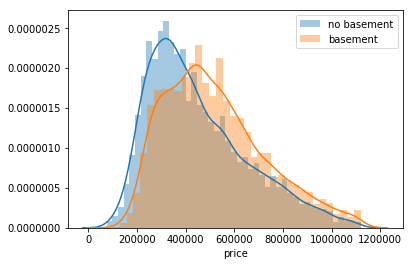

In [ ]:
sns.distplot(df_price.price[df_price.basement==0],label='no basement')
sns.distplot(df_price.price[df_price.basement!=0],label='basement')
plt.legend()
plt.show()

In [ ]:
df.base.value_counts()

0    13126
1     8487
Name: base, dtype: int64

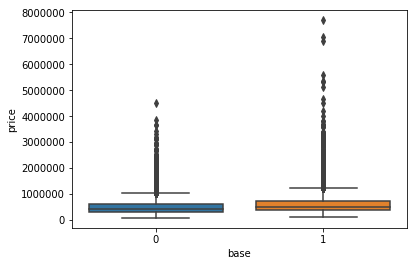

In [ ]:
sns.boxplot('base','price',data=df)

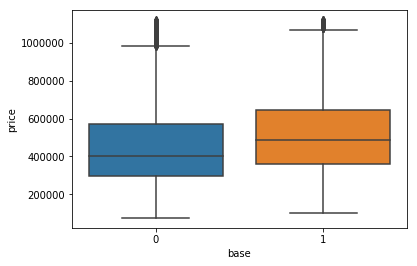

In [ ]:
sns.boxplot('base','price',data=df_price)

## price vs yr_built

In [ ]:
df.yr_built.describe().apply(lambda x: format(x,'f'))

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: object

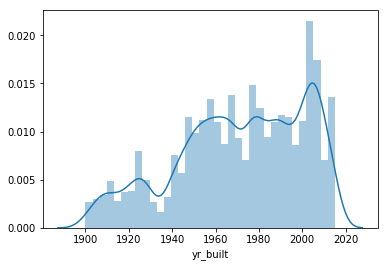

In [ ]:
sns.distplot(df.yr_built)

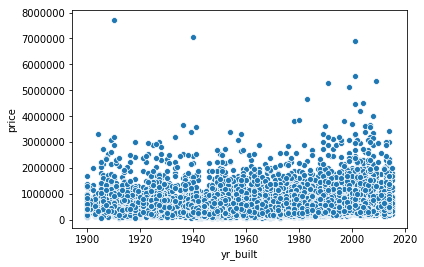

In [ ]:
sns.scatterplot('yr_built','price', data =df)

<Figure size 1440x576 with 0 Axes>

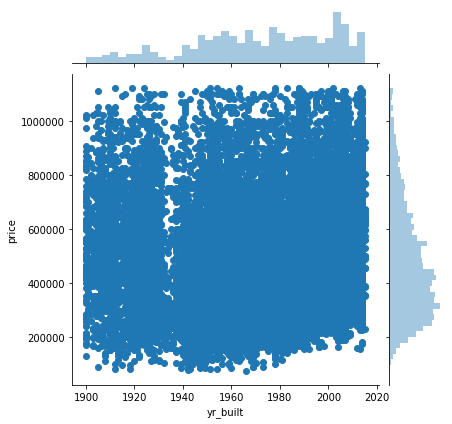

In [ ]:
plt.figure(figsize=(20,8))
sns.jointplot('yr_built','price', data =df_price)
plt.show()

In [ ]:
df.yr_built.nunique()

116

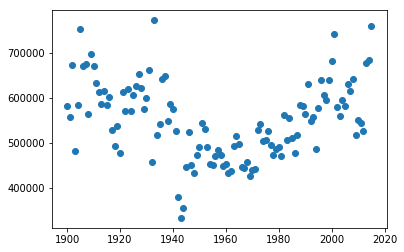

In [ ]:
plt.plot(df.price.groupby(df.yr_built).mean().index,df.price.groupby(df.yr_built).mean(),'o')

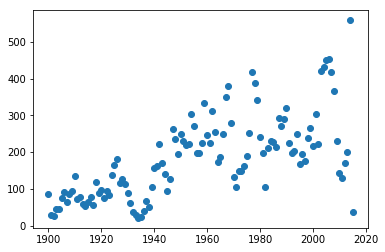

In [ ]:
plt.plot(df.price.groupby(df.yr_built).count().index,df.price.groupby(df.yr_built).count(),'o')

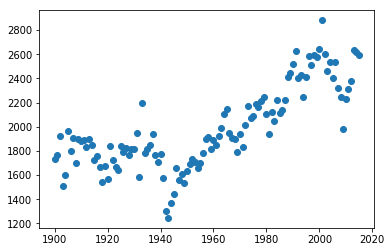

In [ ]:
plt.plot(df.living_measure.groupby(df.yr_built).count().index,df.living_measure.groupby(df.yr_built).mean(),'o')

## price vs yr_renovated

In [ ]:
df.yr_renovated.describe()

count    21613.000000
mean        84.402258
std        401.679240
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [ ]:
df.renovated.value_counts()

0    20699
1      914
Name: renovated, dtype: int64

In [ ]:
(df.living_measure!=df.living_measure15).sum()

19047

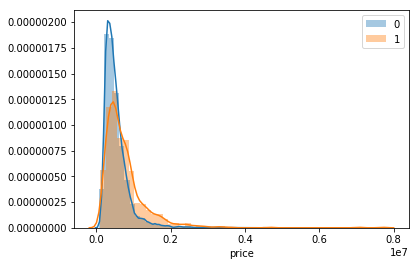

In [ ]:
sns.distplot(df.price[df.renovated==0],label='0')
sns.distplot(df.price[df.renovated==1],label='1')
plt.legend()
plt.show()

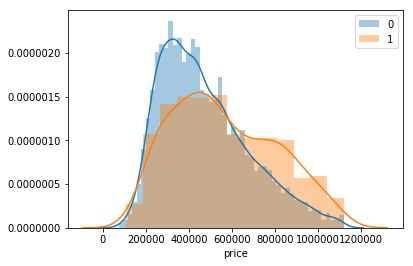

In [ ]:
sns.distplot(df_price.price[df_price.renovated==0],label='0')
sns.distplot(df_price.price[df_price.renovated==1],label='1')
plt.legend()
plt.show()

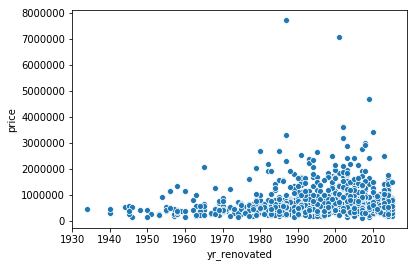

In [ ]:
sns.scatterplot('yr_renovated','price',data=df[df.renovated==1])

In [ ]:
sns.jointplot('yr_renovated','price',data=df_price[df_price.renovated==1],kind='reg')

In [ ]:
sns.jointplot(df[df.renovated==1].price.groupby(df[df.renovated==1].yr_renovated).mean().index,df[df.renovated==1].price.groupby(df[df.renovated==1].yr_renovated).mean(),kind='reg')

In [ ]:
plt.plot(df_price[df_price.renovated==1].price.groupby(df_price[df_price.renovated==1].yr_renovated).mean().index,df_price[df_price.renovated==1].price.groupby(df_price[df_price.renovated==1].yr_renovated).mean(),'o')

In [ ]:
df.price[df.renovated==0].mean()

## price vs zipcode

In [ ]:
df.zipcode.nunique()

In [ ]:
plt.plot(df.price.groupby(df.zipcode).mean().index,df.price.groupby(df.zipcode).mean(),'o')

In [ ]:
plt.plot(df.price.groupby(df.zipcode).count().index,df.price.groupby(df.zipcode).count(),'o') #cant see any relation

In [ ]:
plt.plot(df.price.groupby(df.zipcode).sum().index,df.price.groupby(df.zipcode).sum(),'o') #cant see any relation

check tableau

## price vs long

In [ ]:
sns.jointplot('long','price', data=df_price)

## price vs lat

In [ ]:
sns.jointplot('lat','price', data=df_price)

In [ ]:
sns.lmplot(x='lat',y='long',hue='price',data=df_price)#,fit_reg=False)
plt.show()

## price vs living_measure15

In [ ]:
df.living_measure15.describe()

In [ ]:
q1=df.living_measure15.describe()['25%']
q3=df.living_measure15.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_living_measure15=df[(df.living_measure15<ul) & (df.living_measure15>ll)]
df_living_measure15.living_measure15.describe().apply(lambda x: format(x, 'f'))

In [ ]:
sns.jointplot('living_measure15','price',data=df_price,kind='reg')

## price vs lot_measure15

In [ ]:
df.lot_measure15.describe()

In [ ]:
q1=df.lot_measure15.describe()['25%']
q3=df.lot_measure15.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_lot_measure15=df[(df.lot_measure15<ul) & (df.lot_measure15>ll)]
df_lot_measure15.lot_measure15.describe().apply(lambda x: format(x, 'f'))

In [ ]:
q1=df_price.lot_measure15.describe()['25%']
q3=df_price.lot_measure15.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_price_lot_measure15=df_price[(df_price.lot_measure15<ul) & (df_price.lot_measure15>ll)]

In [ ]:
sns.jointplot('lot_measure15','price',data=df_price_lot_measure15,kind='reg')

In [ ]:
sns.jointplot('lot_measure15','price',data=df_lot_measure15)

## price vs furnished

In [ ]:
df.furnished.value_counts()

In [ ]:
sns.boxplot('furnished','price',data=df_price)

In [ ]:
sns.distplot(df.price[df.furnished==0],label='0')
sns.distplot(df.price[df.furnished==1],label='1')
plt.legend()
plt.show()

In [ ]:
sns.distplot(df_price.price[df_price.furnished==0],label='0')
sns.distplot(df_price.price[df_price.furnished==1],label='1')
plt.legend()
plt.show()

###price vs total_area

In [ ]:
df.total_area.describe().apply(lambda x: format(x,'f'))

In [ ]:
q1=df.total_area.describe()['25%']
q3=df.total_area.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_total_area=df[(df.total_area<ul) & (df.total_area>ll)]
df_total_area.total_area.describe().apply(lambda x: format(x, 'f'))

In [ ]:
q1=df_price.total_area.describe()['25%']
q3=df_price.total_area.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_price_total_area=df_price[(df_price.total_area<ul) & (df_price.total_area>ll)]

In [ ]:
sns.jointplot('total_area','price',data=df_price_total_area,kind='reg')

##room_bed

In [ ]:
df.room_bed.value_counts()

In [ ]:
sns.distplot(df.room_bed,kde=False)

In [ ]:
df.room_bed.describe()

In [ ]:
df2=df[df['room_bed'].isin([2,3,4,5,6,7,8])]

In [ ]:
df2.shape

In [ ]:
np.corrcoef(df.room_bed,df.price)

In [ ]:
#sns.distplot(df.price[df.room_bed==0],label='0')
#sns.distplot(df.price[df.room_bed==1],label='1')
sns.distplot(df.price[df.room_bed==2],label='2')
sns.distplot(df.price[df.room_bed==3],label='3')
sns.distplot(df.price[df.room_bed==4],label='4')
sns.distplot(df.price[df.room_bed==5],label='5')
#sns.distplot(df.price[df.room_bed==6],label='6')
#sns.distplot(df.price[df.room_bed==7],label='7')
#sns.distplot(df.price[df.room_bed==8],label='8')
#sns.distplot(df.price[df.room_bed==9],label='9')
#sns.distplot(df.price[df.room_bed==10],label='10')
plt.legend()
plt.show()

In [ ]:
df5=df[(df.room_bed<6) & (df.room_bed>1)]
np.corrcoef(df5.price,df5.room_bed)

In [ ]:
from scipy.stats import f_oneway
g2=df.price[df.room_bed==2]
g3=df.price[df.room_bed==3]
g4=df.price[df.room_bed==4]
g5=df.price[df.room_bed==5]
print(g2.mean(),g3.mean(),g4.mean(),g5.mean())
print(g2.std(),g3.std(),g4.std(),g5.std())

In [ ]:
sns.distplot(g2)
sns.distplot(g3)

In [ ]:
from scipy.stats import shapiro, anderson

In [ ]:
shapiro(g2),shapiro(g3)

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
mannwhitneyu(g2,g3)

In [ ]:
f_oneway(g2,g3)

In [ ]:
df.price.describe()

In [ ]:
q1=df.price.describe()['25%']
q3=df.price.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [ ]:
df1=df[(df.price<ul) & (df.price>ll)]
df1.price.describe()

In [ ]:
shapiro(np.log(df1.price))

In [ ]:
gr2=df1.price[df1.room_bed==2]
gr3=df1.price[df1.room_bed==3]
gr4=df1.price[df1.room_bed==4]
gr5=df1.price[df1.room_bed==5]

In [ ]:
sns.distplot(np.log(gr2),label='2')
sns.distplot(np.log(gr3),label='3')
#sns.distplot(np.log(gr4),label='4')
#sns.distplot(np.log(gr5),label='5')
plt.legend()
plt.show()

In [ ]:
shapiro(np.log(g2)),shapiro(np.log(g3))

In [ ]:
g2.mean(),g3.mean()

In [ ]:
mannwhitneyu(np.log(gr2),np.log(gr3))

In [ ]:
df1.shape

In [ ]:
statsmodels.graphics.gofplots.qqplot(np.log(gr5),line='s')
plt.show()

In [ ]:
sns.distplot(df.living_measure[df.room_bed==2],label='2')
sns.distplot(df.living_measure[df.room_bed==3],label='3')
sns.distplot(df.living_measure[df.room_bed==4],label='4')
sns.distplot(df.living_measure[df.room_bed==5],label='5')
plt.legend()
plt.show()

In [ ]:
sns.distplot(df1.living_measure[df1.room_bed==2],label='2')
sns.distplot(df1.living_measure[df1.room_bed==3],label='3')
#sns.distplot(df1.living_measure[df1.room_bed==4],label='4')
#sns.distplot(df1.living_measure[df1.room_bed==5],label='5')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(pd.crosstab(df_room_bed.room_bed,df_room_bed.furnished,values=df_room_bed.price,aggfunc='mean'),annot=True,cmap='coolwarm')
plt.show()

##room_bath

In [ ]:
sns.distplot(df.room_bed)

In [ ]:
sns.distplot(df.room_bath)

In [ ]:
df6=pd.DataFrame()

##living_measure

In [ ]:
df.living_measure.describe()

In [ ]:
sns.distplot(df.living_measure)
plt.show()

In [ ]:
q1=df.living_measure.describe()['25%']
q3=df.living_measure.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df3=df[(df.living_measure<ul) & (df.living_measure>ll)]
df3.living_measure.describe()

In [ ]:
sns.distplot(np.log(df3.living_measure))
plt.show()

In [ ]:
anderson(df3.living_measure),anderson(np.log(df3.living_measure))

In [ ]:
#log transformation giving better results towards normality than outlier treatment
anderson(df.living_measure),anderson(np.log(df.living_measure))

In [ ]:
sns.scatterplot('living_measure','lot_measure',hue='ceil',data=df,palette='ocean')

In [ ]:
sns.scatterplot('living_measure','price',data=df) # can see the correlation but this suffers hetroschedasticity

In [ ]:
df_price['diff']=df_price.living_measure-df_price.living_measure15

In [ ]:
df_price['diff2']=df_price['diff'].where(df_price['diff']==0,df_price['diff']/df_price['diff'].apply(abs))

In [ ]:
sns.boxplot('diff2','price',data=df_price)

In [ ]:
sns.jointplot('diff','price',df_price[df_price.diff2==1],kind='reg')

In [ ]:
sns.scatterplot('living_measure','living_measure15',data=df[df.basement==0],hue='renovated')

In [ ]:
df.columns

#Data Preperation and Outlier Treatment

In [ ]:
df.info()

# Dummyfication

In [ ]:
for i in df.columns:
  if i in ['room_bed','room_bath','ceil','coast','sight','condition','quality','zipcode','furnished','base','renovated']:
    df[i]=df[i].apply(str)

In [ ]:
cat=['room_bed','room_bath','ceil','coast','sight','condition','quality','zipcode','furnished','base','renovated']
cont=['dayhours','price','living_measure','lot_measure','ceil_measure','basement','yr_built','yr_renovated','lat','long','living_measure15','lot_measure15','total_area']

In [ ]:
df.info()

In [ ]:
for i in cat:
  print(i,df[i].nunique())

In [ ]:
df_mod=pd.get_dummies(df,drop_first=True)

In [ ]:
df_mod.shape

In [ ]:
df_mod.head(3)

## outlier treatment

In [ ]:
df_mod.columns.tolist()

In [ ]:
df_out=pd.DataFrame()
df_out['dayhours']=np.ones((1,21613),dtype=bool).ravel()

In [ ]:
q1=df_mod.price.describe()['25%']
q3=df_mod.price.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_out['price']=(df_mod.price<ul) & (df_mod.price>ll)

In [ ]:
df_out.price.head()

In [ ]:
q1=df_mod.living_measure.describe()['25%']
q3=df_mod.living_measure.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_out['living_measure']=(df_mod.living_measure<ul) & (df_mod.living_measure>ll)

In [ ]:
q1=df_mod.lot_measure.describe()['25%']
q3=df_mod.lot_measure.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_out['lot_measure']=(df_mod.lot_measure<ul) & (df_mod.lot_measure>ll)

In [ ]:
q1=df_mod.ceil_measure.describe()['25%']
q3=df_mod.ceil_measure.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_out['ceil_measure']=(df_mod.ceil_measure<ul) & (df_mod.ceil_measure>ll)

In [ ]:
q1=df_mod[df_mod.basement!=0].basement.describe()['25%']
q3=df_mod[df_mod.basement!=0].basement.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_out['basement']=(df_mod.basement<ul) & (df_mod.basement>ll)

In [ ]:
df_out['yr_built']=np.ones((1,21613),dtype=bool).ravel()

In [ ]:
df_out['yr_renovated']=np.ones((1,21613),dtype=bool).ravel()

In [ ]:
df_out['lat']=np.ones((1,21613),dtype=bool).ravel()

In [ ]:
df_out['long']=np.ones((1,21613),dtype=bool).ravel()

In [ ]:
q1=df_mod.living_measure15.describe()['25%']
q3=df_mod.living_measure15.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_out['living_measure15']=(df_mod.living_measure15<ul) & (df_mod.living_measure15>ll)

In [ ]:
q1=df_mod.lot_measure15.describe()['25%']
q3=df_mod.lot_measure15.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_out['lot_measure15']=(df_mod.lot_measure15<ul) & (df_mod.lot_measure15>ll)

In [ ]:
q1=df_mod.total_area.describe()['25%']
q3=df_mod.total_area.describe()['75%']
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df_out['total_area']=(df_mod.total_area<ul) & (df_mod.total_area>ll)

In [ ]:
for i in ['room_bed_1',
 'room_bed_10',
 'room_bed_11',
 'room_bed_2',
 'room_bed_3',
 'room_bed_33',
 'room_bed_4',
 'room_bed_5',
 'room_bed_6',
 'room_bed_7',
 'room_bed_8',
 'room_bed_9',
 'room_bath_0.5',
 'room_bath_0.75',
 'room_bath_1.0',
 'room_bath_1.25',
 'room_bath_1.5',
 'room_bath_1.75',
 'room_bath_2.0',
 'room_bath_2.25',
 'room_bath_2.5',
 'room_bath_2.75',
 'room_bath_3.0',
 'room_bath_3.25',
 'room_bath_3.5',
 'room_bath_3.75',
 'room_bath_4.0',
 'room_bath_4.25',
 'room_bath_4.5',
 'room_bath_4.75',
 'room_bath_5.0',
 'room_bath_5.25',
 'room_bath_5.5',
 'room_bath_5.75',
 'room_bath_6.0',
 'room_bath_6.25',
 'room_bath_6.5',
 'room_bath_6.75',
 'room_bath_7.5',
 'room_bath_7.75',
 'room_bath_8.0',
 'ceil_1.5',
 'ceil_2.0',
 'ceil_2.5',
 'ceil_3.0',
 'ceil_3.5',
 'coast_1',
 'sight_1',
 'sight_2',
 'sight_3',
 'sight_4',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'quality_10',
 'quality_11',
 'quality_12',
 'quality_13',
 'quality_3',
 'quality_4',
 'quality_5',
 'quality_6',
 'quality_7',
 'quality_8',
 'quality_9',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98118',
 'zipcode_98119',
 'zipcode_98122',
 'zipcode_98125',
 'zipcode_98126',
 'zipcode_98133',
 'zipcode_98136',
 'zipcode_98144',
 'zipcode_98146',
 'zipcode_98148',
 'zipcode_98155',
 'zipcode_98166',
 'zipcode_98168',
 'zipcode_98177',
 'zipcode_98178',
 'zipcode_98188',
 'zipcode_98198',
 'zipcode_98199',
 'furnished_1',
 'base_1',
 'renovated_1']:
       df_out[i]=np.ones((1,21613),dtype=bool).ravel()

# replacing outliers with Null values

In [ ]:
df_out.head()

In [ ]:
df_mod.shape

In [ ]:
df_mod.head()

In [ ]:
df_null = pd.DataFrame(np.array([np.nan]*(21613*151)).reshape(21613,151))
df_null.head()

In [ ]:
df_out =pd.DataFrame(np.where(df_out,df_mod,df_null),columns=df_mod.columns)

In [ ]:
df_out.isnull().sum()

In [ ]:
df_out['out']=df_out.isnull().sum(axis=1) #each row wise total sum of the nulls in a row

In [ ]:
df_out.out

In [ ]:
df_out.out.value_counts() 
# sum of the 0 nulls in a row in the dataset are 17,786
# sum of the 3 nulls in a row in the dataset are 1651
#sum of the 1 null in a row in the dataset are 944 
# sum of the 2 nulls in a roe are in the dataset 665

In [ ]:
df_out['ind']=df.index.tolist()

In [ ]:
df_out.ind.shape

In [ ]:
df_out=df_out[df_out.out.isin([0,1,2,3])]
seq=df_out.ind

In [ ]:
seq.head()

In [ ]:
df_out.shape

In [ ]:
df_out.drop(['out','ind'],1,inplace=True)

In [ ]:
df_out.head()

# Null imputation using Mice

In [ ]:
!pip install impyute

In [ ]:
from impyute.imputation.cs import mice

In [ ]:
df_ao=mice(df_out)

In [ ]:
df_ao.columns=df_mod.columns
df_ao.head()

In [ ]:
df_ao=df_ao.iloc[:,:13]
df_ao.head()

In [ ]:
#df_ao['room_bed']=df.iloc[seq].room_bed.values
#df_ao.loc[:,['price']]

In [ ]:
df_ao=df_ao.iloc[:,:13]
df_ao['room_bed']=df.iloc[seq].room_bed.values
df_ao['room_bath']=df.iloc[seq].room_bath.values
df_ao['ceil']=df.iloc[seq].ceil.values
df_ao['coast']=df.iloc[seq].coast.values
df_ao['sight']=df.iloc[seq].sight.values
df_ao['condition']=df.iloc[seq].condition.values
df_ao['quality']=df.iloc[seq].quality.values
df_ao['zipcode']=df.iloc[seq].zipcode.values
df_ao['furnished']=df.iloc[seq].furnished.values
df_ao['base']=df.iloc[seq].base.values
df_ao['renovated']=df.iloc[seq].renovated.values
df_ao.head()

In [ ]:
df_ao.columns.tolist()

# Model building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge, Lasso

In [ ]:
x=df_ao.drop(['price'],1)
y=df_ao.price
x=pd.get_dummies(x,drop_first=True)
n,p=x.shape

In [ ]:
#ss=StandardScaler()
#sx=ss.fit_transform(x)

In [ ]:
#pca=PCA(9)
#pcasx1=pca.fit_transform(sx1)

In [ ]:
#l=[]
#for i in range(1,13):
#  l.append(pca.explained_variance_ratio_[:i].sum())
#l

In [ ]:
#xf=np.concatenate((pcasx1,x2),1)

In [ ]:
#xf.shape

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=100)

In [ ]:
lr=LinearRegression()
results = model_selection.cross_val_score(lr, x, y, cv=kfold)
results.mean(),results.var(),1-((1-results.mean())*(n-1)/(n-p-1))

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
x.shape

In [ ]:
for i in range(x.shape[1]):
  if x.columns[i] in cont:
    print(x.columns[i], variance_inflation_factor(x.values, i))

In [ ]:
x=df_ao.drop(['price','lot_measure','lot_measure15','ceil_measure','basement','total_area','living_measure15','yr_built','yr_renovated','dayhours','long','lat',
              'room_bath','room_bed','furnished','base','renovated','coast','condition','ceil'],1)
x.head()

In [ ]:
y=df_ao.price
print(x.columns)
x=pd.get_dummies(x,drop_first=True)
n,p=x.shape
print(p)
lr=LinearRegression()
results = model_selection.cross_val_score(lr, x, y, cv=kfold)
print(results.mean(),results.var())
adjr2=1-((1-results.mean())*(n-1)/(n-p-1))
print('adjr2',adjr2)

In [ ]:
x.columns.tolist()

In [ ]:
x=df_ao.drop(['price','lot_measure15'],1)
x.head()

In [ ]:
y=df_ao.price
print(x.columns)
x=pd.get_dummies(x,drop_first=True)
n,p=x.shape
print(p)
lr=LinearRegression()
results = model_selection.cross_val_score(lr, x, y, cv=kfold)
print(results.mean(),results.var())
adjr2=1-((1-results.mean())*(n-1)/(n-p-1))
print('adjr2',adjr2)

In [ ]:
for i in ['lot_measure','lot_measure15','ceil_measure','basement','total_area','living_measure15','yr_built','yr_renovated','dayhours','long','lat',
              'room_bath','room_bed','furnished','base','renovated','coast','condition','ceil']:
              l=['price','lot_measure','lot_measure15','ceil_measure','basement','total_area','living_measure15','yr_built','yr_renovated','dayhours','long','lat',
              'room_bath','room_bed','furnished','base','renovated','coast','condition','ceil']
              l.remove(i)
              x=df_ao.drop(l,1)
              y=df_ao.price
              x=pd.get_dummies(x,drop_first=True)
              lr=LinearRegression()
              results = model_selection.cross_val_score(lr, x, y, cv=kfold)
              adjr2=1-((1-results.mean())*(n-1)/(n-p-1))
              print(i,'adjr2',adjr2)

In [ ]:
x.shape

In [ ]:
for i in range(x.shape[1]):
  print(x.columns[i],variance_inflation_factor(x.values, i))

In [ ]:
df_ao.columns

In [ ]:
x=df_ao.drop(['price','lot_measure15'],1)
y=df_ao.price
x=pd.get_dummies(x,drop_first=True)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
print(lr.score(xtrain,ytrain),lr.score(xtest,ytest))
ypred=lr.predict(xtest)

In [ ]:
sns.jointplot(ypred,ytest)

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
selector = RFE(lr, 5, step=1)
selector = selector.fit(x, y)
selector.support_ 

In [ ]:
selector.ranking_

In [ ]:
dt=DecisionTreeRegressor(max_depth=7)
rf=RandomForestRegressor()
ab=AdaBoostRegressor(dt)
br=BayesianRidge()

In [ ]:
results = model_selection.cross_val_score(dt, x, y, cv=kfold)
print(results.mean())

In [ ]:
results = model_selection.cross_val_score(rf, x, y, cv=kfold)
print(results.mean())

In [ ]:
results = model_selection.cross_val_score(br, x, y, cv=kfold)
print(results.mean(),results.var())

In [ ]:
dt=DecisionTreeRegressor()
ab=AdaBoostRegressor(dt)
results = model_selection.cross_val_score(ab, x, y, cv=kfold)
print(results.mean(),results.var())

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=47)
ss=StandardScaler()
scale=ss.fit(xtrain)
sxtrain=scale.transform(xtrain)
sxtest=scale.transform(xtest)

In [ ]:
lr=LinearRegression()
lr.fit(sxtrain,ytrain)
c1=lr.coef_
c1

In [ ]:
lr=Lasso()
lr.fit(sxtrain,ytrain)
c2=lr.coef_
c2

In [ ]:
lr=Ridge()
lr.fit(sxtrain,ytrain)
c3=lr.coef_
c3

In [ ]:
xtrain.columns

In [ ]:
plt.figure(figsize=(16,5))
#plt.plot(xtrain.columns,c1,'o-',label='linear')
plt.plot(xtrain.columns,c2,'o-',label='Lasso')
plt.plot(xtrain.columns,c3,'o-',label='ridge')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
(df.living_measure==df.living_measure15).count()

In [ ]:
df_org.cid.nunique()-df_org.shape[0]

In [ ]:
df_org.cid.value_counts()

In [ ]:
df_org[df_org.cid==2724049222]

#Clustering House type:

In [ ]:
df.columns

In [ ]:
df2=df1.loc[:, ['room_bed', 'room_bath', 'living_measure','living_measure15', 'coast', 'sight', 'quality', 'basement', 'furnished']]

In [ ]:
#df2['basement']=pd.Series(np.zeros(21613)).where(df2.basement==0,1)

In [ ]:
sdf2=StandardScaler().fit_transform(df2)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ks=[2,3,4,5,6,7,8,9]
ssw=[]
for k in ks:
    kmeans=KMeans(n_clusters=int(k))
    kmeans.fit(df2)
    sil_scores=silhouette_score(df2,kmeans.labels_)
    print('silhouette score:',sil_scores,'number of clusters:',int(k))
    ssw.append(kmeans.inertia_)
plt.plot(ks,ssw)

In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df2)
df2['cluster']=kmeans.labels_

In [ ]:
df2.cluster.value_counts()

In [ ]:
df2.columns

In [ ]:
df2['price']=df.price

In [ ]:
sns.scatterplot('price','living_measure',data=df2,hue='cluster')

In [ ]:
df2.price[df2.cluster==0].mean(),df2.price[df2.cluster==1].mean(),df2.price[df2.cluster==2].mean()

#rough work:

In [ ]:
d1=pd.DataFrame(np.array([1,2,3,4,5,6,7,8]).reshape(4,2),columns='A B'.split())

In [ ]:
k=['a','b','c','d'].remove('a')
k

In [ ]:
d2=pd.DataFrame(np.array([True,False,True,False,True,False,False,True]).reshape(4,2),columns='A B'.split())
d2

In [ ]:
d1[~d2]

In [ ]:
np.ones((1,21613),dtype=bool)

In [ ]:
len('0.6666666666666666')

In [ ]:
df_org.cid.value_counts().value_counts()

In [ ]:
df_org.cid.nunique()

In [ ]:
df_org.cid.count()

In [ ]:
df.dayhours.max()

In [ ]:
df.dayhours.value_counts()

In [ ]:
1-(20454/21436)

In [ ]:
df.columns

In [ ]:
df_cont=df[['price','living_measure','lot_measure','ceil_measure','basement','yr_built','yr_renovated','living_measure15','lot_measure15','total_area']]

In [ ]:
corr=df_cont.corr()

In [ ]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

In [ ]:
sns.pairplot(df_cont)